In [1]:
import open3d as o3d

pcd = o3d.io.read_point_cloud("Data/road scan 20220209/road scan 20220209 raw.pts")
print(pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
PointCloud with 128100105 points.


In [10]:
cropped = o3d.io.read_point_cloud("Data/road scan 20220209/road scan 20220209 cropped.pts")
print(cropped)

PointCloud with 20019221 points.


In [7]:
o3d.visualization.draw_geometries([cropped],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [8]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers: ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    # inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                      zoom=0.3412,
                                      front=[0.4257, -0.2125, -0.8795],
                                      lookat=[2.6172, 2.0475, 1.532],
                                      up=[-0.0694, -0.9768, 0.2024])

In [11]:
cl, ind = cropped.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
display_inlier_outlier(cropped, ind)

Showing outliers (red) and inliers: 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 


In [ ]:
cl, ind = cropped.remove_radius_outlier(nb_points=20, radius=0.1)
display_inlier_outlier(cropped, ind)

In [12]:
plane_model, inliers = cropped.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = cropped.select_by_index(inliers)
outlier_cloud = cropped.select_by_index(inliers, invert=True)
outlier_cloud.paint_uniform_color([1.0, 0, 0])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Plane equation: 0.01x + 0.01y + 1.00z + 1.72 = 0
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [13]:
further_cropped = inlier_cloud

In [14]:
plane_model, inliers = further_cropped.segment_plane(distance_threshold=0.05,
                                                     ransac_n=3,
                                                     num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = further_cropped.select_by_index(inliers)
outlier_cloud = further_cropped.select_by_index(inliers, invert=True)
outlier_cloud.paint_uniform_color([1.0, 0, 0])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Plane equation: 0.00x + 0.00y + 1.00z + 1.72 = 0
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 


In [18]:
cropped_unfinished = o3d.io.read_point_cloud("Data/road scan 20220209/road scan 20220209 cropped (unfinished).pts")
print(cropped_unfinished)

PointCloud with 14467877 points.


In [19]:
cl, ind = cropped_unfinished.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
display_inlier_outlier(cropped_unfinished, ind)

Showing outliers (red) and inliers (gray): 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [20]:
cropped_unfinished_1 = cropped_unfinished.select_by_index(ind)

In [21]:
o3d.visualization.draw_geometries([cropped_unfinished_1],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [22]:
plane_model, inliers = cropped_unfinished_1.segment_plane(distance_threshold=0.05, ransac_n=3, num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = cropped_unfinished_1.select_by_index(inliers)
outlier_cloud = cropped_unfinished_1.select_by_index(inliers, invert=True)
outlier_cloud.paint_uniform_color([1.0, 0, 0])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Plane equation: 0.00x + 0.00y + 1.00z + -0.04 = 0
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [8]:
import open3d as o3d
import numpy as np

# Load saved point cloud and visualize it
pcd_load = o3d.io.read_point_cloud("Data/road scan 20220209/road scan 20220209 cropped - part 1.pts")

# Convert Open3D.o3d.geometry.PointCloud to numpy array
xyz_load = np.asarray(pcd_load.points)
print(xyz_load)

[[ 4.549565 -4.268276 -0.041502]
 [ 4.234519 -4.127534 -0.0297  ]
 [ 4.984956 -4.271745 -0.044693]
 ...
 [ 4.814621  6.357383 -0.014563]
 [ 4.927264  6.014793 -0.027133]
 [ 5.193063  6.330411 -0.052023]]


In [9]:
print(pcd_load)
print(np.max(xyz_load[:,0]), np.min(xyz_load[:,0]))
print(np.max(xyz_load[:,1]), np.min(xyz_load[:,1]))
print(np.max(xyz_load[:,2]), np.min(xyz_load[:,2]))

PointCloud with 1685861 points.
5.219596 0.472537
10.026744 -4.711235
0.058002 -0.074029


In [27]:
import math

height_map = np.zeros((476, 4251))
num_points = np.zeros((476, 4251))

for point in xyz_load:
    x_coor = math.floor(point[0]*100) - 46
    y_coor = math.floor(point[1]*100) + 472
    if num_points[x_coor][y_coor] == 0:
        height_map[x_coor][y_coor] = point[2]
        num_points[x_coor][y_coor] = 1
    else:
        height_map[x_coor][y_coor] = ((height_map[x_coor][y_coor]*num_points[x_coor][y_coor]) + point[2])/(num_points[x_coor][y_coor]+1)
        num_points[x_coor][y_coor] += 1

for x in range(1,475):
    for y in range(1,4250):
        if num_points[x][y] == 0:
            height_map[x][y] = (height_map[x-1][y-1]*np.sign(num_points[x-1][y-1])+height_map[x][y-1]*np.sign(num_points[x][y-1])+height_map[x+1][y-1]*np.sign(num_points[x+1][y-1])+height_map[x-1][y]*np.sign(num_points[x-1][y])+height_map[x+1][y]*np.sign(num_points[x+1][y])+height_map[x-1][y+1]*np.sign(num_points[x-1][y+1])+height_map[x][y+1]*np.sign(num_points[x][y+1])+height_map[x+1][y+1]*np.sign(num_points[x+1][y+1]))/(np.sign(num_points[x-1][y-1])+np.sign(num_points[x][y-1])+np.sign(num_points[x+1][y-1])+np.sign(num_points[x-1][y])+np.sign(num_points[x+1][y])+np.sign(num_points[x-1][y+1])+np.sign(num_points[x][y+1])+np.sign(num_points[x+1][y+1]))
            num_points[x][y] = 1


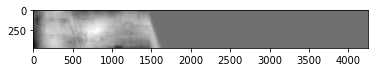

In [28]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(height_map, cmap='gray')

In [29]:
plt.imsave("height map 1.png", height_map, cmap='gray')